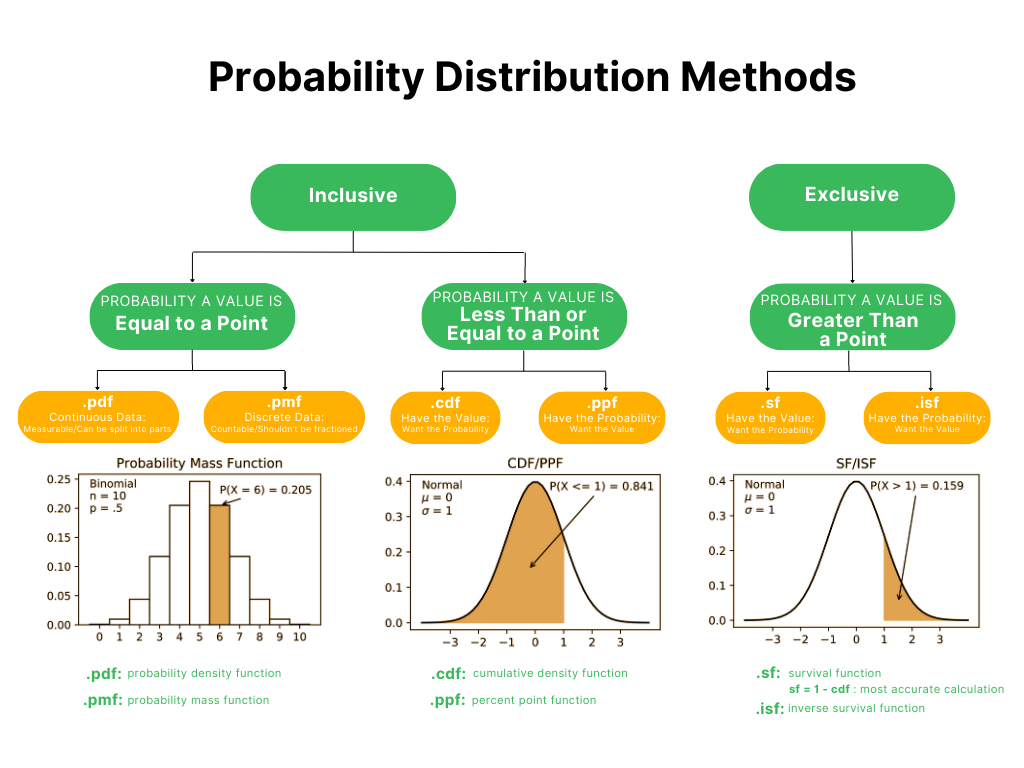

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a **Poisson distribution** with a **mean of 2 cars**. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

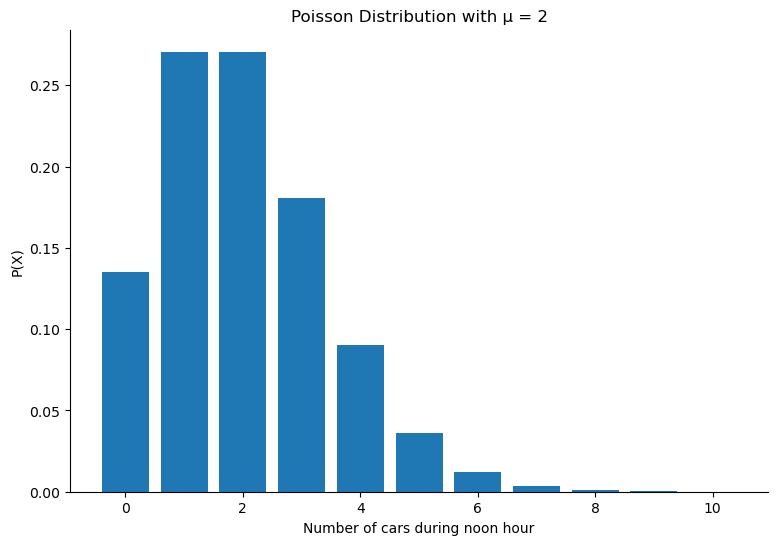

In [103]:
# Let's visualize this distribution

μ = 2

x = np.arange(0,11)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)
plt.title("Poisson Distribution with μ = 2")
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');

## 1.1 What is the probability that no cars drive up in the noon hour?

Text(3, 0.22, '$P(X = 0) = 0.135$')

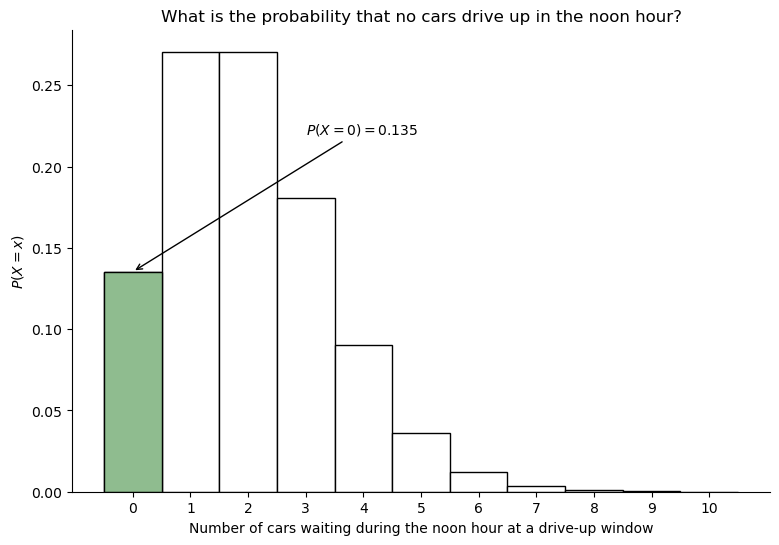

In [104]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0, 
    stats.poisson(μ).pmf(0), 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)
plt.annotate(
    f'$P(X = 0) = {stats.poisson(μ).pmf(0):.3f}$', 
    (0, stats.poisson(2).pmf(0)), 
    xytext=(3, .22), 
    arrowprops={'arrowstyle': '->'}
)
plt.show()

In [22]:
stats.poisson(μ).pmf(0)

0.1353352832366127

In [23]:
round(stats.poisson(μ).pmf(0), 2)

0.14

## 1.2 What is the probability that 3 **or more** cars come through the drive through?

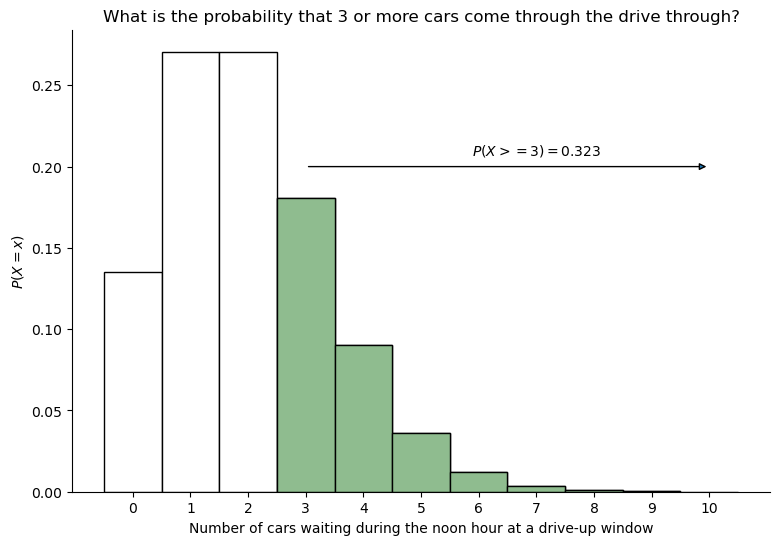

In [107]:
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that 3 or more cars come through the drive through?')

x1 = np.arange(3, 10)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')

plt.annotate('', xy=(3, .20), xytext=(10, .20), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
plt.text(7, .21, f'$P(X >= 3) = {stats.poisson(μ).sf(2):.3f}$', va='center', ha='center')
plt.show()

In [24]:
# since Poisson events are DISCRETE, I can adjust the parameter of .sf()
stats.poisson(μ).sf(2)

0.32332358381693654

## 1.3 How likely is it that the drive through gets at least 1 car?

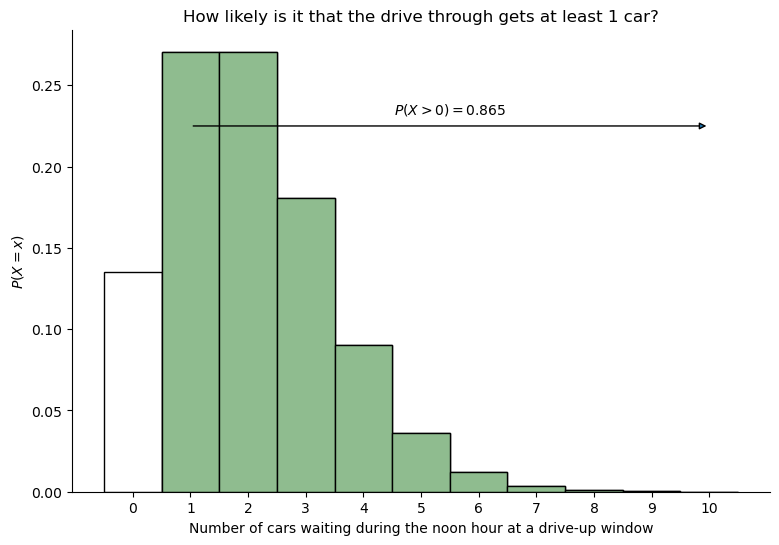

In [108]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('How likely is it that the drive through gets at least 1 car?')

x1 = np.arange(1, 11)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.poisson(μ).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

In [25]:
# Same as 1 - stats.poisson(μ).pmf(0) ~= .86
stats.poisson(μ).sf(0)

0.8646647167633873

In [26]:
round(stats.poisson(μ).sf(0),2)

0.86

# 2. Grades of State University graduates are **normally distributed** with a **mean of 3.0** and a **standard deviation of .3**. Calculate the following:

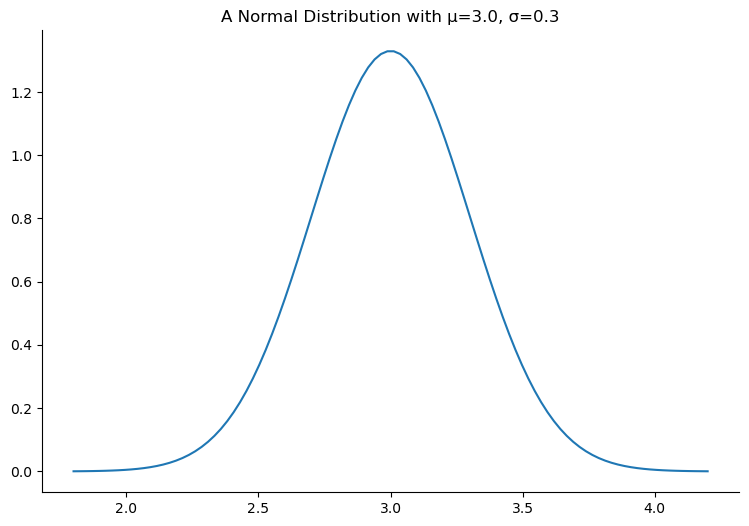

In [110]:
μ = 3.0
σ = 0.3
grade = stats.norm(μ, σ)

x = np.linspace(μ - 4*σ, μ + 4*σ, 100)
y = grade.pdf(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')
plt.show()

## 2.1 What grade point average is required to be in the **top 5%** of the graduating class?

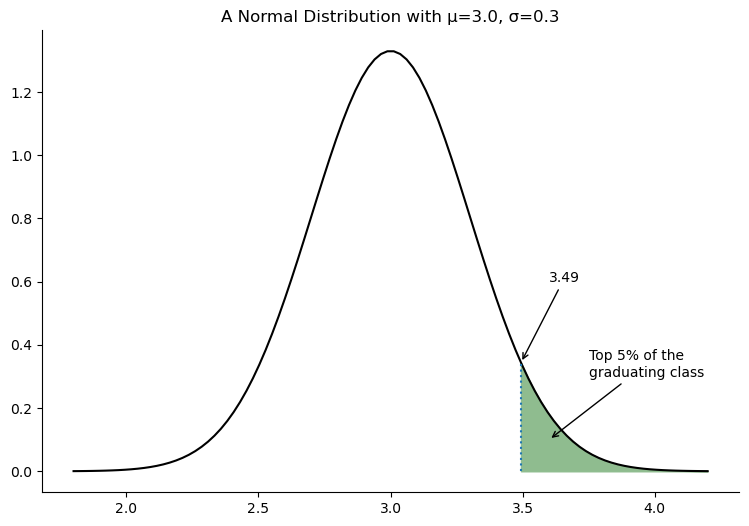

In [111]:
top_5_percent_cutoff = grade.isf(0.05)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(top_5_percent_cutoff, 0, grade.pdf(top_5_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(top_5_percent_cutoff, μ + 4*σ)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{top_5_percent_cutoff:,.2f}', (top_5_percent_cutoff, grade.pdf(top_5_percent_cutoff)),
             xytext=(3.6, .6), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Top 5% of the\ngraduating class', (3.6, .1), xytext=(3.75, .3), arrowprops={'arrowstyle': '->'})

plt.show()

In [29]:
#Since our GPA is continuous (ints cut into decimals)
#the exclusiveness of 0.05 is ok b'c the next decimal point is included.

grade.isf(0.05)

3.4934560880854417

In [30]:
#or the opposite is true as well
grade.ppf(0.95)

3.4934560880854417

## 2.2 What GPA constitutes the **bottom 15%** of the class?

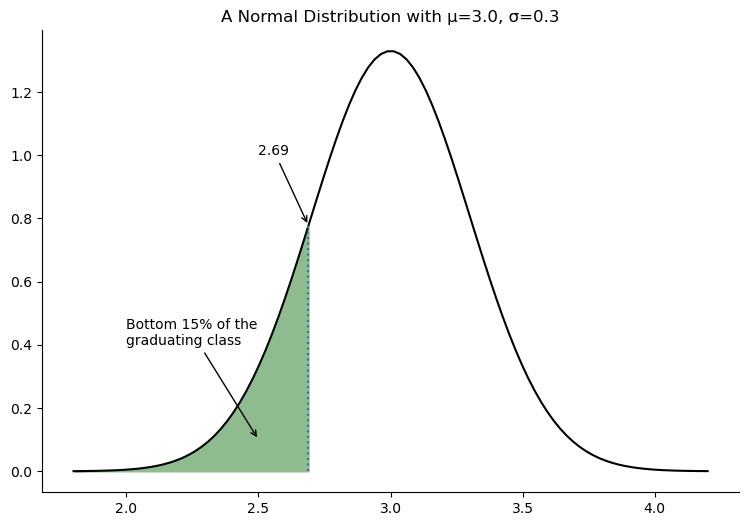

In [112]:
bottom_15_percent_cutoff = grade.ppf(0.15)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(bottom_15_percent_cutoff, 0, grade.pdf(bottom_15_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(μ - 4*σ, bottom_15_percent_cutoff)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{bottom_15_percent_cutoff:,.2f}', (bottom_15_percent_cutoff, grade.pdf(bottom_15_percent_cutoff)),xytext=(2.5, 1.0), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Bottom 15% of the\ngraduating class', (2.5, .1), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

plt.show()

In [31]:
grade.ppf(.15)

2.689069983151863

In [32]:
#the opposite is also true
grade.isf(.85)

2.689069983151863

## 2.3 An eccentric alumnus left scholarship money for students in the **third decile** from the bottom of their class. Determine the range of the third decile. Would a student with a **2.8 grade point average** qualify for this scholarship?

<div class="alert alert-block alert-info">
<b>NOTE:</b> 
    <br>
1st decile: 0-10 percentile
     <br>
2nd decile:10-20 percentile
     <br>
3rd decile: 20-30 percentile</div>


In [115]:
range_of_gpas= grade.ppf([.20,.30])
range_of_gpas

array([2.74751363, 2.84267985])

In [116]:
(range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8)

True

## 2.4 If I have a GPA of **3.5**, what **percentile** am I in?

In [34]:
grade.cdf(3.5)

0.9522096477271853

In [33]:
print(f'You are in the {(grade.cdf(3.5).round(2))*100}th percentile.')

You are in the 95.0th percentile.


In [ ]:
grade.sf(3.5)

In [35]:
print(f'You are in the top {(grade.sf(3.5).round(2))*100}th percentile.')

You are in the top 5.0th percentile.


# 3. A marketing website has an average click-through rate of **2%**. One day they observe **4326 visitors** and **97 click-throughs**.
## How likely is it that this many people **or more** click through?

<div class="alert alert-block alert-info">
<b>What we know:</b>
    
- Success rate: 2% (0.02)
    
- n_trials: 4326
</div>

In [36]:
n_trials = 4326
p= .02
click_throughs = stats.binom(n_trials, p)

<div class="alert alert-block alert-info">
<b>What we want:</b>
    
- Probability
    
- More than
</div>

In [37]:
click_throughs.sf(96)

0.13975823631416448

<b>Walkthrough using simulation</b>

In [24]:
clicks= np.random.choice([0,1], (10_000, 4326), p = [.98,.02])
clicks

#([0,1] is click or not- true / false)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
(clicks.sum(axis=1) >96).mean()

0.1327

# 4. You are working on some statistics homework consisting of **100 questions** where all of the answers are a *probability rounded to the hundreths place*. Looking to save time, you put down **random probabilities** as the answer to each question.
- What is the **probability** that **at least one** of your first **60** answers is correct?


In [40]:
#What we know

n = 60 #First 60 questions/trials
p = 0.01 #1/100 b'c it's some random number between 0 & 1

stats_hmwk = stats.binom(n, p)

In [41]:
stats_hmwk.sf(0)

0.45284335760923855

# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a **3%** chance that any one student cleans the break area when they visit it, and on any given day, about **90%** of the **3 active cohorts of 22 students** visit the break area. 

In [50]:
#What we know:
# 90% (0.9) of the 3, 22 student classes visit the break rm
#3% (0.03) chance they'll clean it

#number of students that visit break area
n_students = round(.9 * 22 * 3)

#probability of success
p= .03


<b>Let's visualize this</b>

Text(0.5, 1.0, 'Messy Breakroom?')

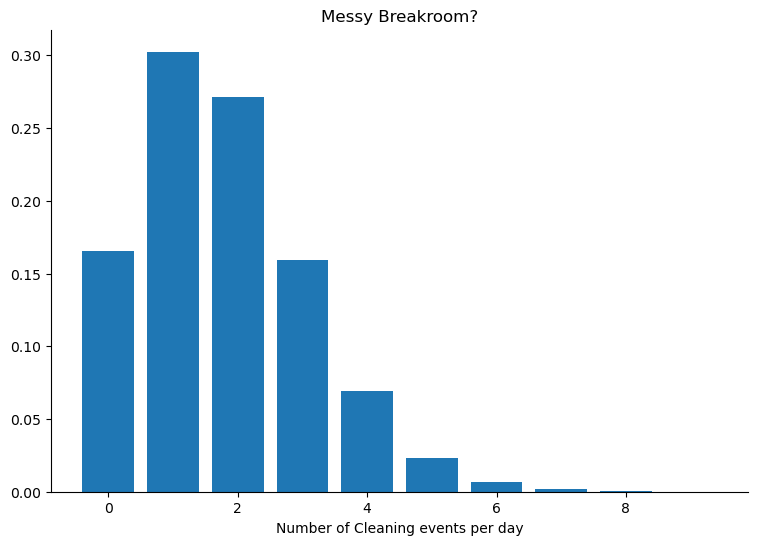

In [51]:
x = np.arange(0,10)
y = stats.binom(n_students, p).pmf(x)
plt.bar(x,y)
plt.xlabel('Number of Cleaning events per day')
plt.title('Messy Breakroom?')

## 5.1 How likely is it that the break area gets cleaned up **each day**? 

In [113]:
#"sf(0)" because we want it cleaned more then 0 times
clean = stats.binom(n_students, p)
clean.sf(0)

0.8342199288437352

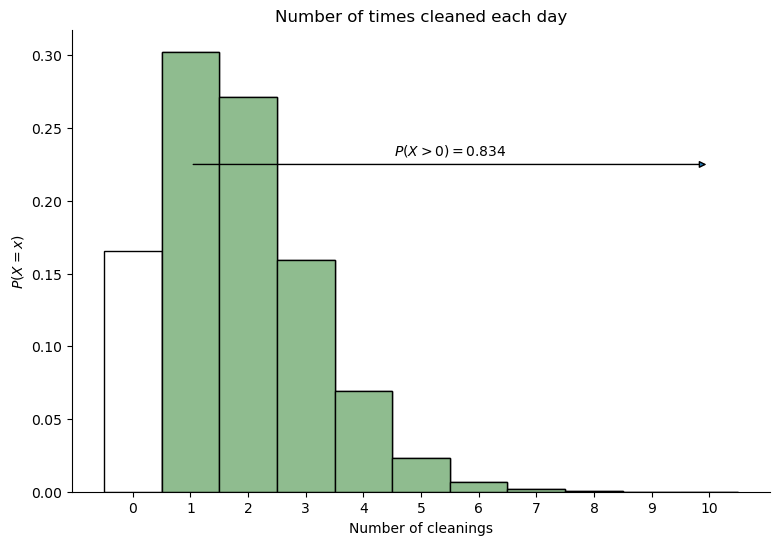

In [114]:
x = np.arange(0, 11)
y = stats.binom(n_students, p).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cleanings')
plt.title('Number of times cleaned each day')

x1 = np.arange(1, 11)
y1 = stats.binom(n_students, p).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.binom(n_students, p).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

## 5.2 How likely is it that it goes **two days without** getting cleaned up? 

In [58]:
# This means the number of possible students avail to clean has doubled!
n = n_students * 2 
p = 0.03
notclean_2 = stats.binom(n, p)

In [59]:
notclean_2.pmf(0)

0.027483031992576134

In [60]:
print(f"It is {round(notclean_2.pmf(0),3)*100}% likely that the breakroom goes two days without cleaning.")

It is 2.7% likely that the breakroom goes two days without cleaning.


## 5.3 All week?

In [61]:
# We don't come in on Sat/Sun! So only *5
n = n_students * 5 
p = 0.03
notclean_5 = stats.binom(n, p)

In [65]:
notclean_5.pmf(0)

0.00012521651388091245

In [64]:
print(f"It is {round(notclean_5.pmf(0),5)*100}% likely that the breakroom goes five days without cleaning.")

It is 0.013% likely that the breakroom goes two days without cleaning.


# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is **normally distributed** with a **mean of 15** and **standard deviation of 3**. If it takes **2 minutes for each person** to order, and **10 minutes from ordering to getting your food**, what is the likelihood that you have **at least 15 minutes left** to eat your food before you have to go back to class? 
- Assume you have *one hour for lunch*, and ignore travel time to and from La Panaderia.

<div class="alert alert-block alert-info">
<b>What we know:</b> 
    
- Units of measurement: Are not the same, so conversion will be needed!
    
    - (60 min lunch) - (15 mins to eat) = 45 mins remaining
    
    - (45 mins left) - (2 mins to order) - (10 mins to get food) = 33 mins avail wait-time
    
- Mean (μ) : 15 PEOPLE, but we are measuring TIME

    - This is also the case with the STDDEV (σ) of 3 <b> people</b>
    
    - To address this, we will multiple the people by their respective order time
    
</div>

In [66]:
μ = 15 * 2 
σ = 3 * 2

total_lunch_time = 60 #mins
eat_time = 15 #mins
order_time = 2 #mins
cook_time = 10 #mins

max_wait = (total_lunch_time - eat_time) - order_time  - cook_time
max_wait

33

In [67]:
#We want the probability you have AT LEAST 15 mins to eat

stats.norm(μ, σ).cdf(max_wait)

0.6914624612740131

In [69]:
print(f"There is a {round(stats.norm(μ, σ).cdf(max_wait), 3)*100}% chance you would have at least 15 minutes remaining to eat.")

There is a 69.1% chance you would have at least 15 minutes remaining to eat.


Text(0.5, 0, 'Wait time')

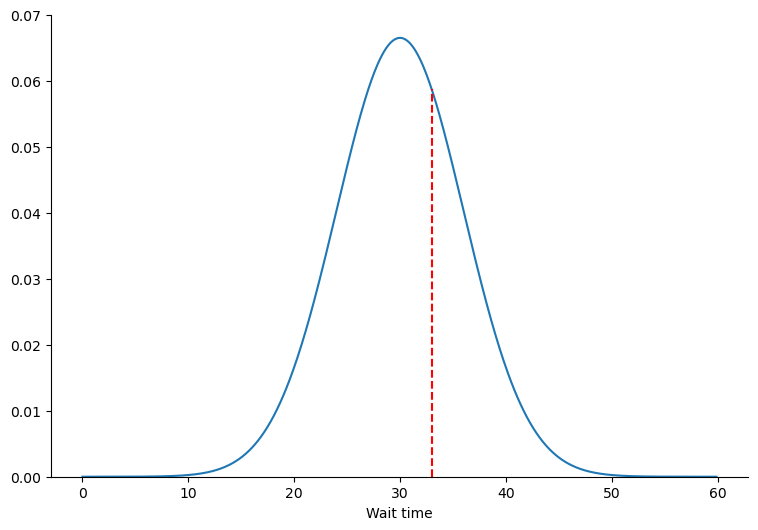

In [70]:
# plot the distibution
x = np.arange(0, 60 , 0.1)
y = stats.norm(μ, σ).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0 ,stats.norm(μ, σ).pdf(33),  ls = '--', color = 'r')
plt.ylim(0,0.07)
plt.xlabel('Wait time')

#### Using PEOPLE instead of TIME
Similarly to the previous solving method, we'd want to use conversion.
Although this time our unit of measurement would want to remain as **PEOPLE**.

- Mean = 15 ppl
- STDDEV = 3 ppl

but....

- wait_time = 33 mins

This can be converted using the knowledge that each **person** has a 2 min order time:

- Therefore: (33 ppl) / (2 mins) = 16.5 ppl

In [72]:
33/2

16.5

In [73]:
μ = 15
σ = 3

stats.norm(μ, σ).cdf(16.5)

0.6914624612740131

# 7. Connect to the `employees` database and find the **average** salary of **current** employees, along with the **standard deviation**. For the following questions, calculate the answer based on modeling the employees salaries with a **normal distribution** defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

<div class="alert alert-block alert-info">
<b>IMPORTANT:</b> 
    <br>
    For this exercises, you will need to add your <b>.gitignore</b> as well as your <b>env.py</b> to this repo.
</div>

In [7]:
from pydataset import data
import env

In [8]:
url = env.get__db_url('employees')
salaries = pd.read_sql('SELECT * FROM salaries where to_date >now()', url)

In [9]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [10]:
μ = salaries.salary.mean()
μ

72012.23585730705

In [11]:
σ = salaries.salary.std()
σ

17309.99538025198

## 7a. What **percent** of employees earn **less than 60,000**?

In [82]:
stats.norm(μ, σ).cdf(60000)

0.24385742480214423

## 7b. What **percent** of employees earn **more than 95,000**?

In [83]:
stats.norm(μ, σ).sf(95000)

0.09208819199804053

## 7c. What **percent** of employees earn **between 65,000 and 80,000**?

In [92]:
# This mean I want:
# More than 65k
# Less than 80k

(stats.norm(μ, σ).cdf(80000)) - (stats.norm(μ, σ).cdf(65000))

0.3350605685446666

In [93]:
#another way to complete same problem
np.diff(stats.norm(μ, σ).cdf([65000,80000]))

array([0.33506057])

In [94]:
stats.norm(μ, σ).cdf([65000,80000])

array([0.34270292, 0.67776349])

In [14]:
( 1 - (stats.norm(μ, σ).cdf(65000))) - stats.norm (μ, σ).sf(80000)

0.3350605685446666

## 7d. What do the **top 5%** of employees **make**?

In [95]:
stats.norm(μ, σ).isf(.05)

100484.64454102777

In [96]:
stats.norm(μ, σ).ppf(.95)

100484.64454102775

In [51]:
#another way to solve it
#The difference above is due to fact that actual salaries are slightly right skewed
salaries.salary.quantile(0.95)

104225.84999999998

<b>Let's visualize this</b>

<AxesSubplot:>

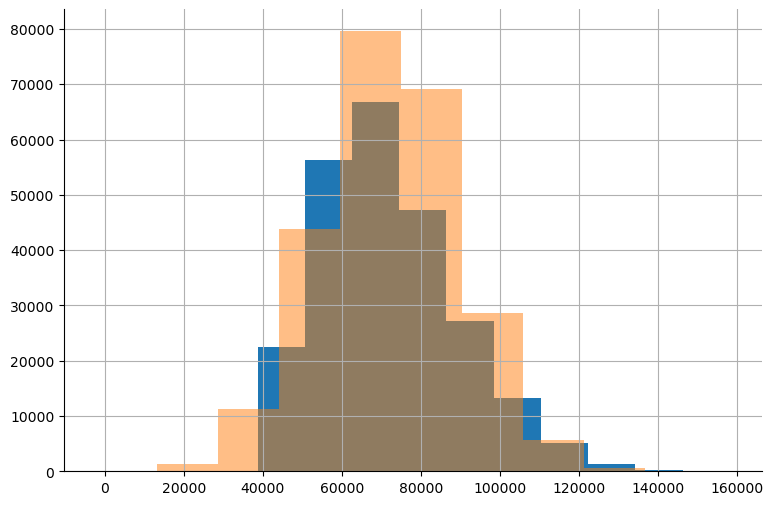

In [102]:
# histogram of actual vs theoretical salary distribution
salaries.salary.hist()
pd.Series(stats.norm(μ, σ).rvs(240124)).hist(alpha = 0.5)